In [1]:
% matplotlib inline

import numpy as np
import numpy.ma as ma
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm
import seawater as sw

import MITgcmutils as mit
from MITgcmutils import cs

from matplotlib import rcParams, rc
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})


/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# work out the indexing for beg/end 1999
# indices start in 1992 to end of 1999

it1=(365*5+366*2)*24
it2=it1+(365*24)

nz=23
ny = 160
nx = 360

In [5]:
its = range(it1,it2,24)
w = np.zeros((ny,nx))
v = np.zeros((ny,nx))
u = np.zeros((ny,nx))

i = 0
for it in its:
    
    # read in temperature and salinity
    #print it
    tmp = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/CRphysics/DDwvel/DDwvel.%010d.data' % it, dtype = '>f')
    tmp = tmp.reshape(23, 160, 360)
    w =+ tmp
    
    tmp = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/CRphysics/DDvvel/DDvvel.%010d.data' % it , dtype = '>f')
    tmp = tmp.reshape(23, 160, 360)
    v =+ tmp
    
    tmp = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/CRphysics/DDuvel/DDuvel.%010d.data' % it , dtype = '>f')
    tmp = tmp.reshape(23, 160, 360)    
    u =+ tmp
    
u = u/len(its)
v = v/len(its)
w = w/len(its)

u.astype('>f4').tofile('/Users/sclayton/Google Drive/work/comparison/data/annual/CR/U.1999.data')       
v.astype('>f4').tofile('/Users/sclayton/Google Drive/work/comparison/data/annual/CR/V.1999.data')       
w.astype('>f4').tofile('/Users/sclayton/Google Drive/work/comparison/data/annual/CR/W.1999.data')       

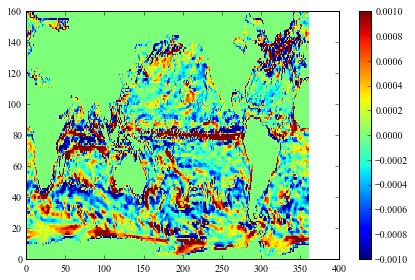

In [19]:
plt.pcolor(w[1,:,:]*60*60*24, shading='flat', vmin = -0.001, vmax = 0.001)
plt.colorbar()
plt.show()